# Tabelas Temporárias

Criar uma tabela temporária serve para guardar dados apenas durante a execução da sessão, sem precisar criar uma tabela física no banco de dados.
Ou seja: os dados existem só enquanto você está conectado. Depois que a sessão fecha, a tabela some automaticamente.

Por que usar uma tabela temporária? (explicação fácil)

Não ocupa espaço fixo no banco
Ela não vira um objeto permanente. Quando acabar o uso, o SQL Server apaga sozinho.

Facilita testes rápidos
Você pode testar SELECTs, JOINs, cálculos e transformações sem mexer nas tabelas oficiais do banco.

Ajuda a organizar etapas de um script
Em vez de fazer uma consulta gigante, você pode salvar resultados intermediários na tabela temporária.

Evita erros em tabelas reais
Como é temporária, não tem risco de estragar dados importantes.

Funciona mesmo sem escolher um banco específico
A tabela fica no tempdb, que é usado automaticamente pelo SQL Server.

### 2. Quando é recomendável criar uma tabela temporária?

1️⃣ Quando a consulta é muito grande ou complexa

Se você tem um SELECT com muitos JOINs, filtros ou cálculos, usar uma tabela temporária ajuda a quebrar o problema em etapas para facilitar a leitura e melhorar a performance.

2️⃣ Quando precisa armazenar dados intermediários

Às vezes, você precisa usar o resultado de um SELECT como base para outras consultas.
Em vez de repetir a consulta várias vezes, você salva o resultado uma vez numa tabela temporária e usa depois.

3️⃣ Para testar códigos sem mexer no banco real

Você pode simular tabelas, fazer testes, validar regras e criar esboços de dados sem risco de corromper dados oficiais.

4️⃣ Quando o mesmo dado será usado várias vezes no script

Se o dado será reutilizado muitas vezes, colocar tudo em uma tabela temporária evita que o SQL execute a mesma consulta várias vezes.

5️⃣ Em processos ETL (carga e transformação de dados)

Em análises, BI ou Data Engineering é comum usar tabelas temporárias para limpar, transformar ou validar dados no meio do caminho.

6️⃣ Para melhorar performance em consultas pesadas

Em alguns cenários, a tabela temporária ajuda o SQL Server a criar estatísticas temporárias e otimizar o plano de execução.

7️⃣ Quando precisa compartilhar dados entre várias etapas da sessão

Ideal quando você precisa montar uma lógica passo a passo, onde cada etapa usa o resultado da anterior.

### 3. Criação de Tabela Temporária Manual

Esse tipo de criação de Tabela Temporária não usa um BD, é apenas uma criação simples que serve como teste, um ensaio.

Além da criação inseri dados fictícos somente para exemplificar.

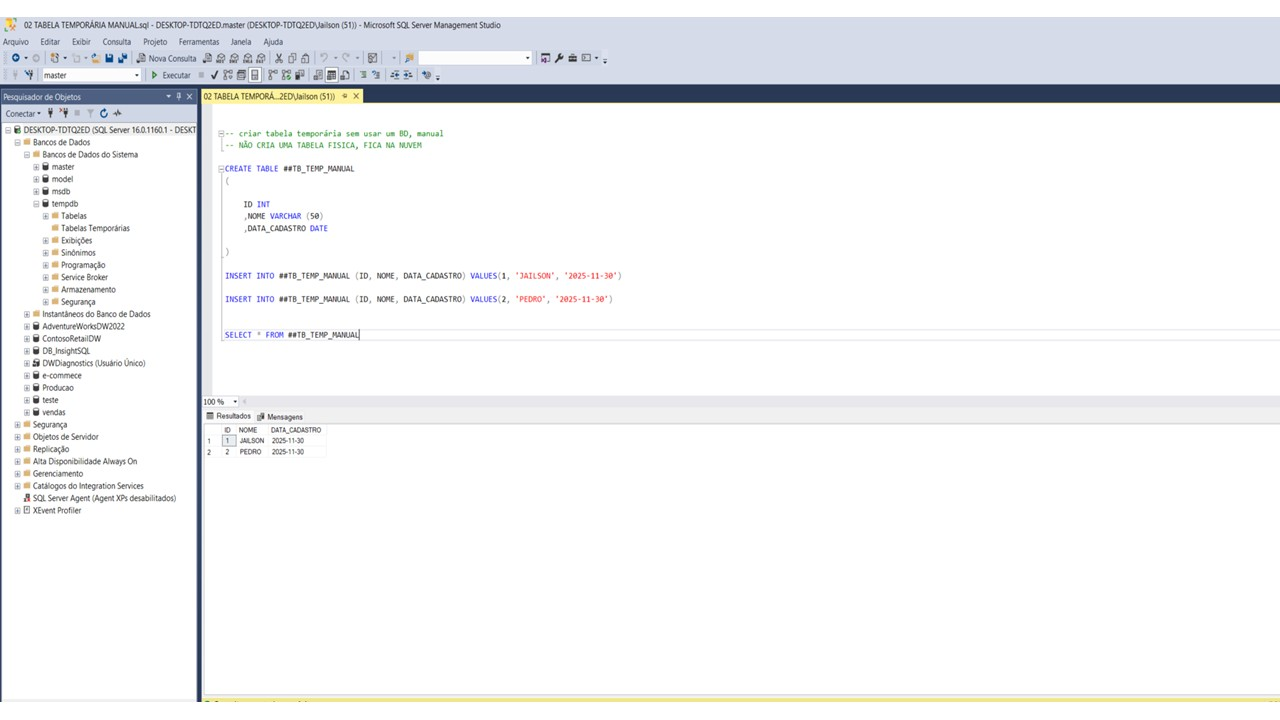

In [2]:
from IPython.display import Image, display

caminho_imagem = r"C:\Users\Jailson\Downloads\CONHECENDO AS TABELAS\06_tabela_temporaria\img\2.JPG"
display(Image(filename=caminho_imagem))

### 4. Criação da Tabela temporária


---

#### Explicação da Query

O objetivo deste trecho de código é demonstrar como criar e utilizar uma tabela temporária local no SQL Server.

#### Selecionando o Banco de Dados

```sql
USE teste;
```

Neste comando, definimos que a consulta será executada no banco de dados **teste**.

---

#### Criando a Tabela Temporária Local

```sql
SELECT *
INTO #tb_temporaria
FROM [dbo].[Categoria];
```

Aqui, estamos criando uma **tabela temporária local** chamada `#tb_temporaria`.
Características importantes:

* A tabela temporária local (`#`) só existe durante a sessão atual e pode ser utilizada apenas dentro desta mesma conexão.
* Caso fosse criada com `##` (tabela temporária global), ela estaria disponível para outras sessões e outras queries.
* Essa tabela temporária está sendo criada como um espelho da tabela original `[dbo].[Categoria]`, copiando toda sua estrutura e seus dados.

---

#### Validando a Criação da Tabela Temporária

```sql
SELECT * FROM #tb_temporaria;
```

Este comando serve para verificar se a tabela temporária foi criada corretamente e se os dados da tabela `[dbo].[Categoria]` foram copiados com sucesso.
O resultado exibido confirmará o espelhamento da tabela original.

---

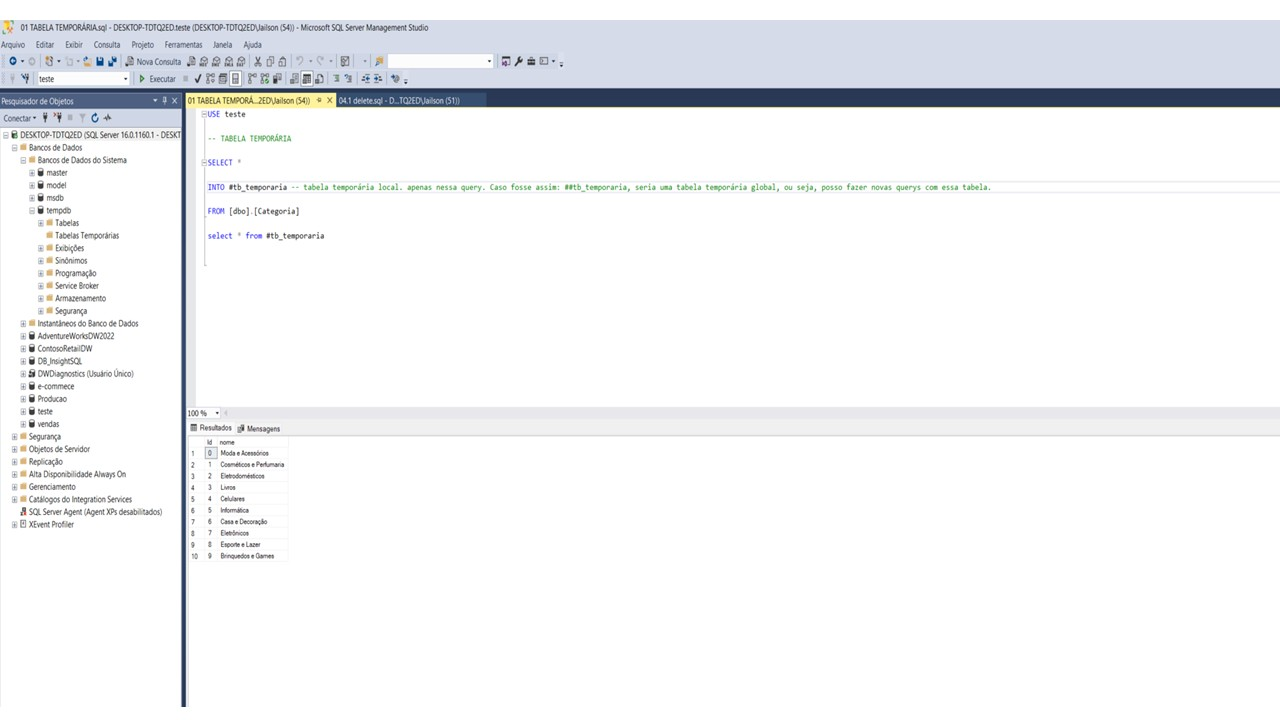

In [1]:
from IPython.display import Image, display

caminho_imagem = r"C:\Users\Jailson\Downloads\CONHECENDO AS TABELAS\06_tabela_temporaria\img\01.JPG"
display(Image(filename=caminho_imagem))

### 5. JOIN com dados de dois Bancos de Dados diferentes usando tabelas temporárias globais.


---

####  *Join entre Bancos Diferentes usando Tabelas Temporárias*

Este script SQL demonstra como **realizar um JOIN entre tabelas que estão em bancos de dados diferentes**, utilizando **tabelas temporárias globais** (`##`).
A estratégia evidencia uma prática útil quando não é permitido (ou não é conveniente) fazer consultas cross-database diretamente.

---

#### Objetivo

Criar uma “ponte” entre dois bancos de dados distintos — **teste** e **e-commece** — copiando as tabelas necessárias para **tabelas temporárias globais**, e então realizar um JOIN entre elas.

---

#### Copiando a Tabela *Produto* para uma Tabela Temporária Global

```sql
USE teste;
SELECT * FROM Produto;
```

Primeiro, acessamos o banco **teste** e carregamos a tabela `Produto`, que contém as informações de cada produto (nome, preço, etc.).

```sql
SELECT *
    INTO ##TEMP_PRODUTO
FROM [dbo].[Produto];
```

Aqui criamos a tabela temporária **##TEMP_PRODUTO**, que passa a existir na tempdb e pode ser usada em qualquer banco da mesma sessão.
Em seguida, fazemos uma conferência:

```sql
SELECT * FROM ##TEMP_PRODUTO;
```

---

#### Copiando a Tabela *Vendas* para uma Tabela Temporária Global

```sql
USE [e-commece];
SELECT * FROM [dbo].[Vendas];
```

Agora acessamos o segundo banco, **e-commece**, onde estão registradas as vendas realizadas.

```sql
SELECT *
    INTO ##TEMP_VENDAS
FROM [dbo].[Vendas];
```

Criamos a tabela temporária **##TEMP_VENDAS** com os dados de vendas.
Logo após, conferimos:

```sql
SELECT * FROM ##TEMP_VENDAS;
```

---

#### Realizando o JOIN entre as Tabelas Temporárias

Com ambas as tabelas já carregadas na memória (tempdb), fazemos o JOIN:

```sql
SELECT 
    V.product_id AS 'ID_PRODUTO',
    V.quantity AS 'QUANTIDADE VENDIDA',
    V.total_price AS 'PREÇO_TOTAL',
    P.name
FROM ##TEMP_VENDAS AS V
LEFT JOIN ##TEMP_PRODUTO AS P ON V.product_id = P.id
WHERE quantity > 1
ORDER BY 3 DESC;
```

#### O que essa etapa faz:

* Junta cada venda ao respectivo produto.
* Retorna apenas vendas com **quantidade maior que 1**.
* Ordena pelo preço total de forma decrescente.
* Mostra:

  * ID do produto,
  * Quantidade vendida,
  * Preço total da venda,
  * Nome do produto.

---

#### Resumo Geral

✔ Usamos duas bases diferentes: **teste** e **e-commece**
✔ Copiamos tabelas para **tabelas temporárias globais** (`##`)
✔ Elas permitiram realizar operações entre bancos distintos sem erro
✔ Finalizamos com um JOIN + filtros + ordenação

---



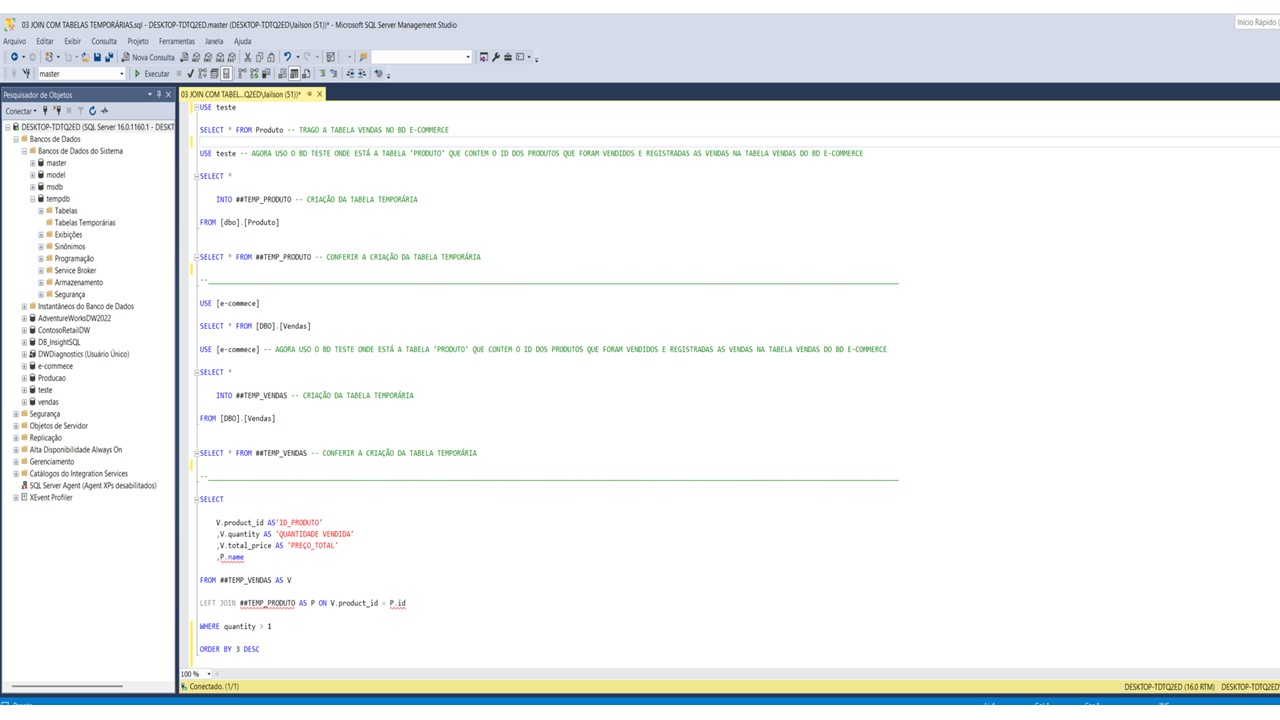

In [3]:
from IPython.display import Image, display

caminho_imagem = r"C:\Users\Jailson\Downloads\CONHECENDO AS TABELAS\06_tabela_temporaria\img\3.JPG"
display(Image(filename=caminho_imagem))

### 5.1 Resultado do JOIN entre tabelas espenho

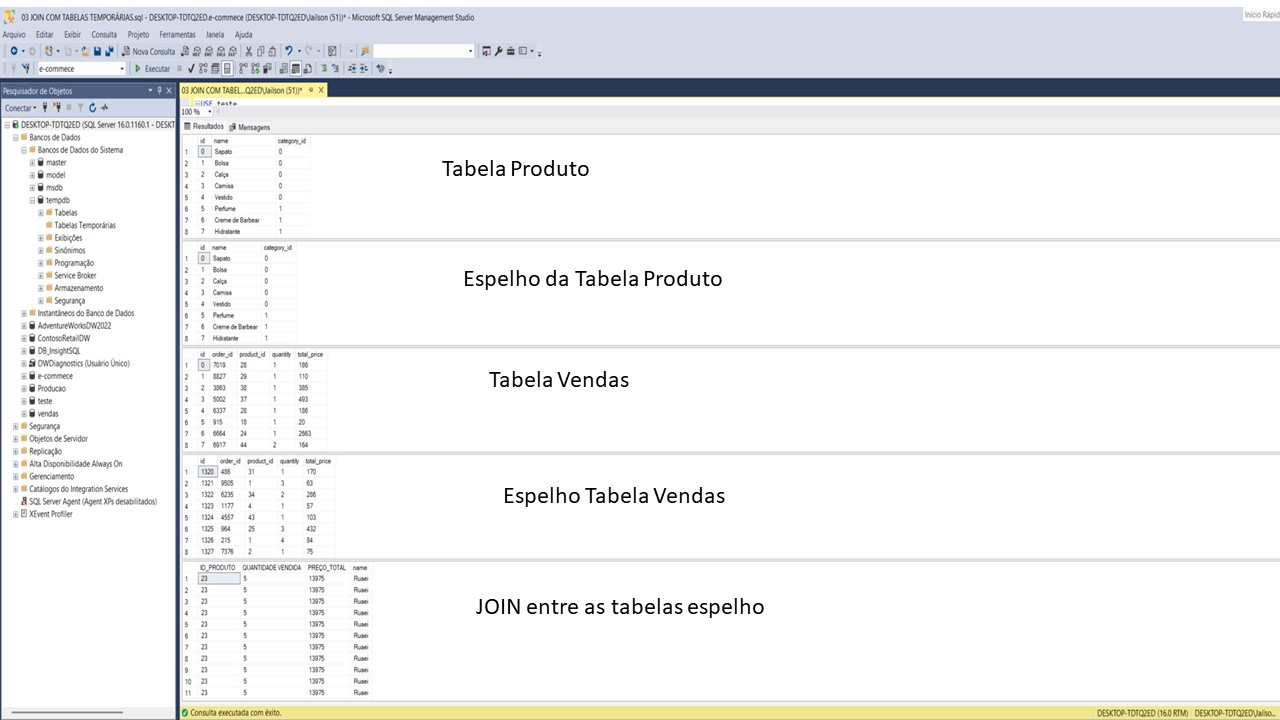

In [4]:
from IPython.display import Image, display

caminho_imagem = r"C:\Users\Jailson\Downloads\CONHECENDO AS TABELAS\06_tabela_temporaria\img\04.JPG"
display(Image(filename=caminho_imagem))